In [1]:
import pandas as pd

In [2]:
shops = pd.read_csv("dataset/shops.csv")
items = pd.read_csv("dataset/items.csv")
items_categories = pd.read_csv("dataset/item_categories.csv")
sales = pd.read_csv("dataset/sales_train.csv")

In [3]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
items_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
#since we predict a total in month
#how sales behaves along the years (in month)
sales['date'] = pd.to_datetime(sales['date'])
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [8]:
sales['day'] = sales['date'].dt.day
sales['month'] = sales['date'].dt.month
sales['year'] = sales['date'].dt.year
sales = sales.drop(columns=['date'])
sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,0,59,22154,999.00,1.0,1,2,2013
1,0,25,2552,899.00,1.0,1,3,2013
2,0,25,2552,899.00,-1.0,1,5,2013
3,0,25,2554,1709.05,1.0,1,6,2013
4,0,25,2555,1099.00,1.0,15,1,2013


In [49]:
#item_cnt per shop per month
df_month = sales[['shop_id', 'month', 'item_cnt_day', ]]
df_month.head()

,shop_id,month,item_cnt_day
0,59,2,1.0
1,25,3,1.0
2,25,5,-1.0
3,25,6,1.0
4,25,1,1.0


In [50]:
a = df_month.groupby(['shop_id','month']).sum().reset_index()
print(a)
print(a.columns)

     shop_id  month  item_cnt_day
0          0      1        3626.0
1          0      2        3957.0
2          0      3         403.0
3          0      4         473.0
4          0      5         465.0
..       ...    ...           ...
693       59      8        4696.0
694       59      9        3995.0
695       59     10        3689.0
696       59     11        3448.0
697       59     12        4728.0

[698 rows x 3 columns]
Index(['shop_id', 'month', 'item_cnt_day'], dtype='object')


/home/hieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/hieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/hieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see

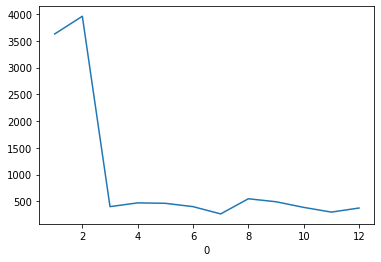

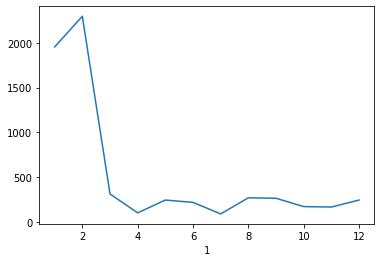

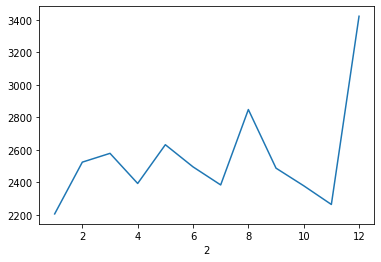

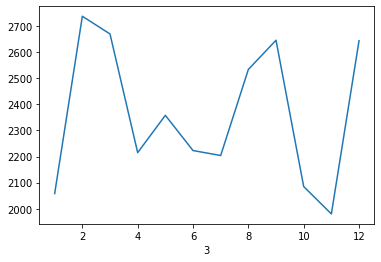

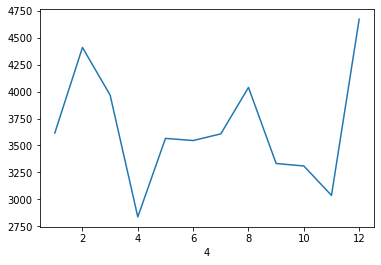

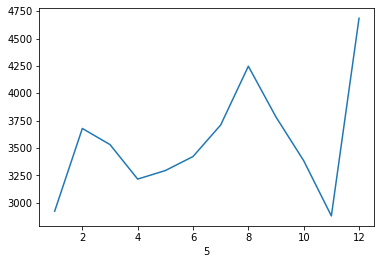

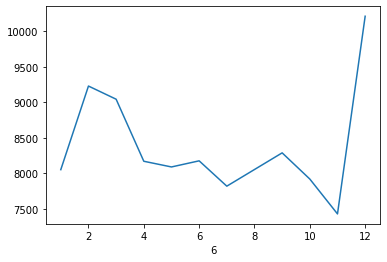

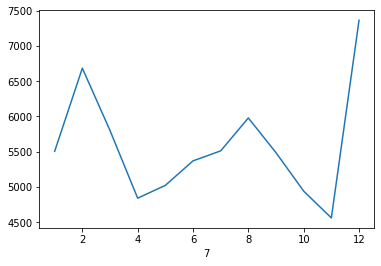

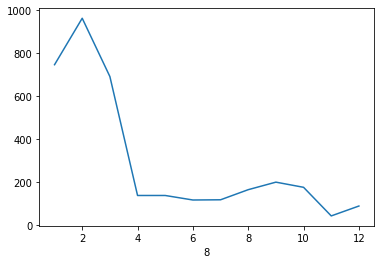

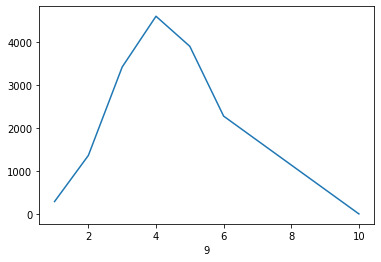

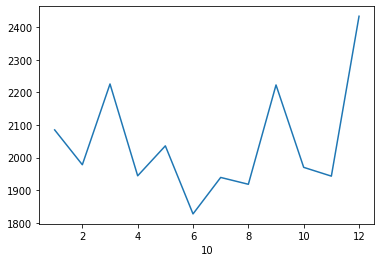

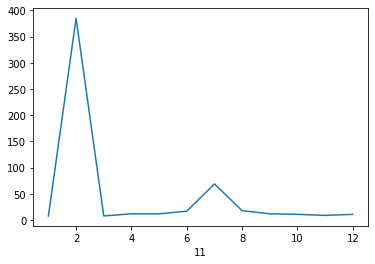

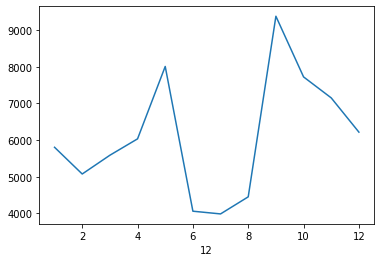

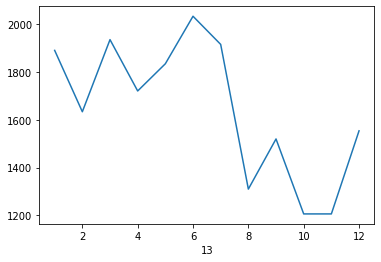

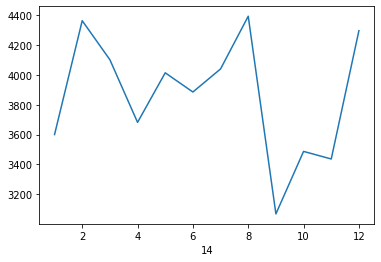

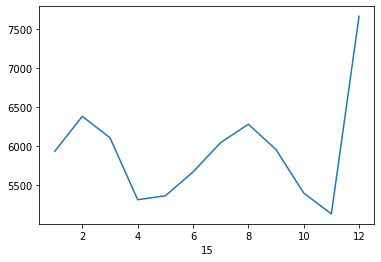

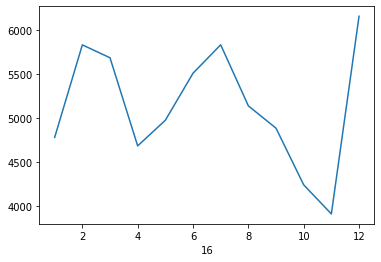

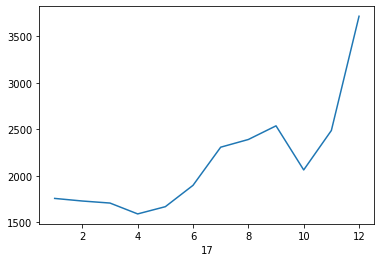

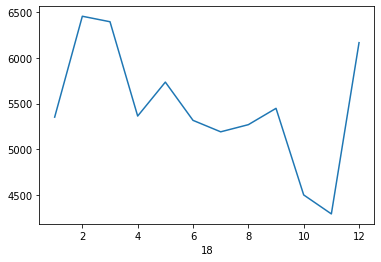

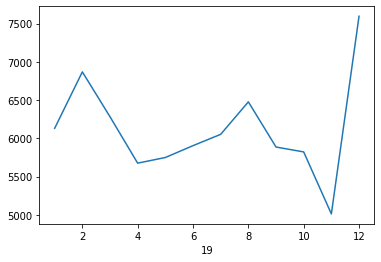

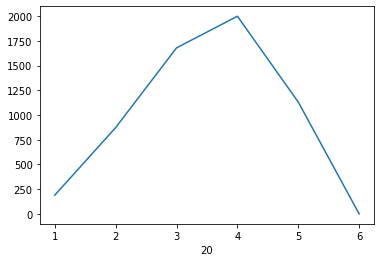

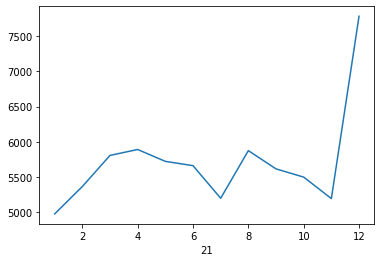

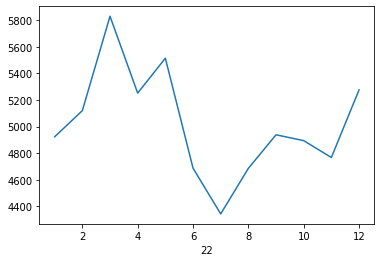

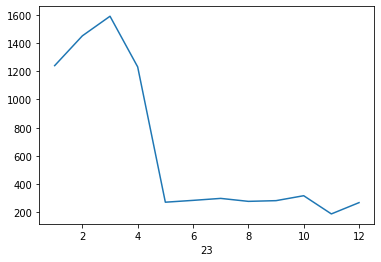

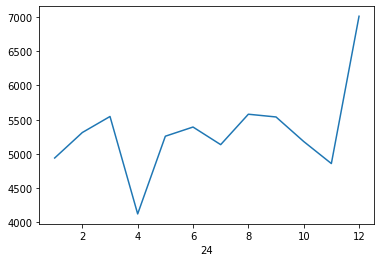

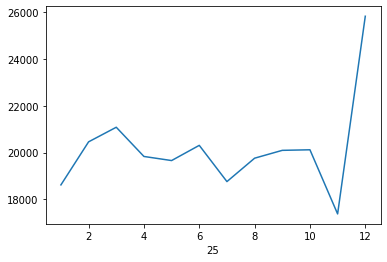

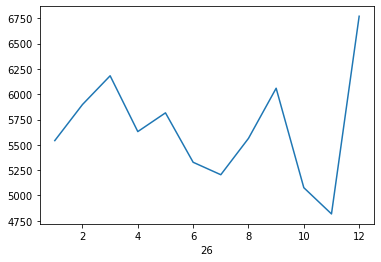

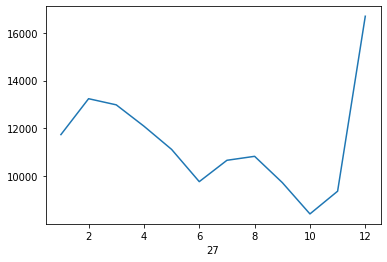

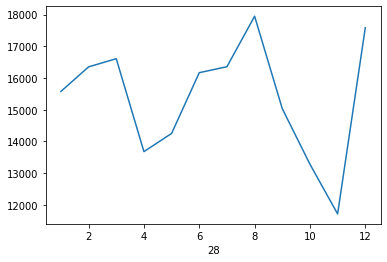

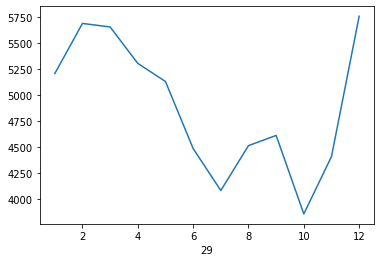

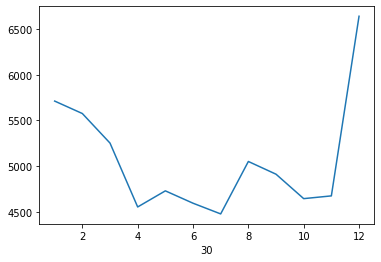

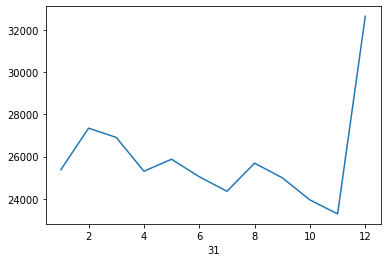

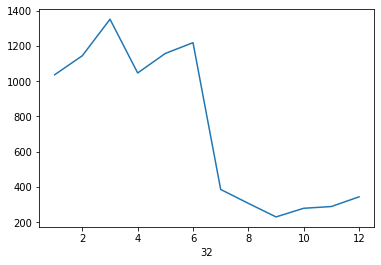

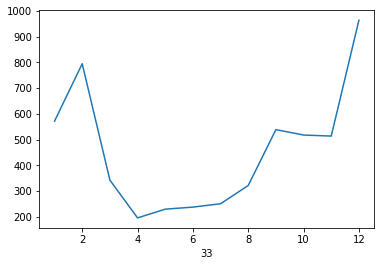

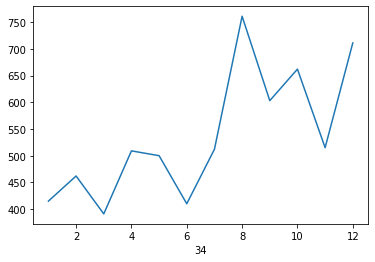

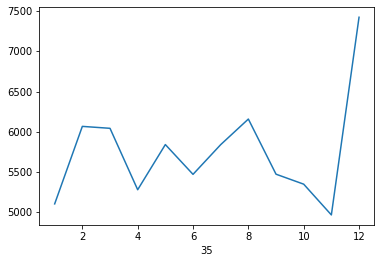

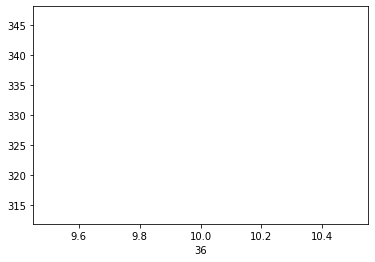

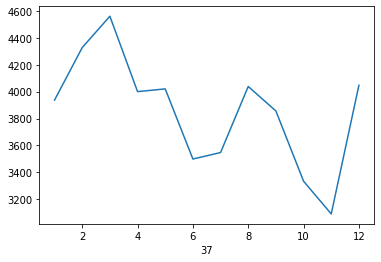

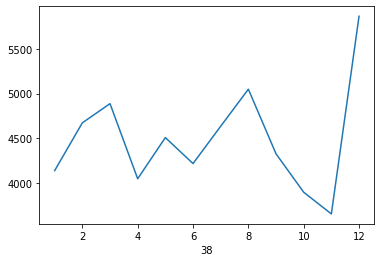

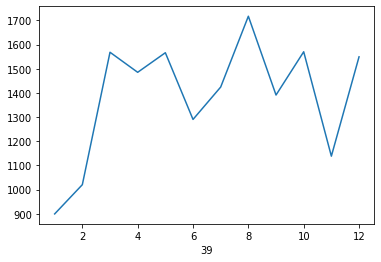

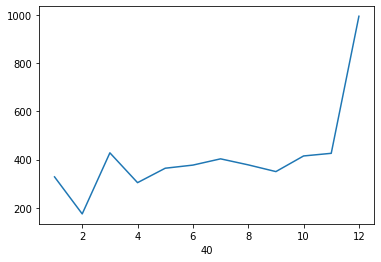

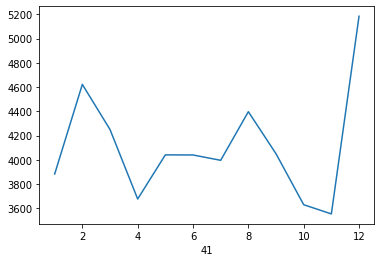

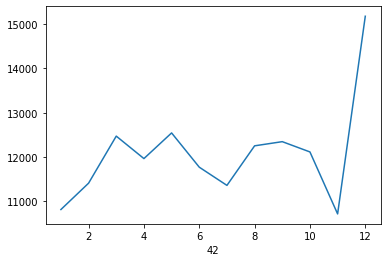

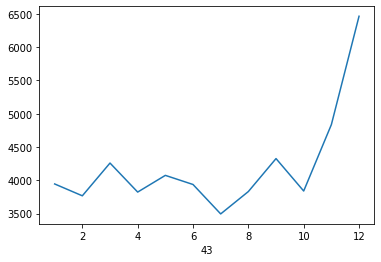

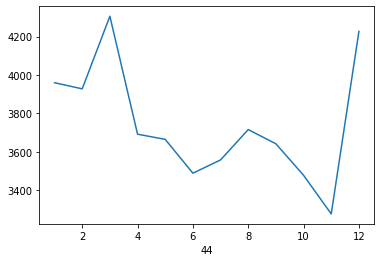

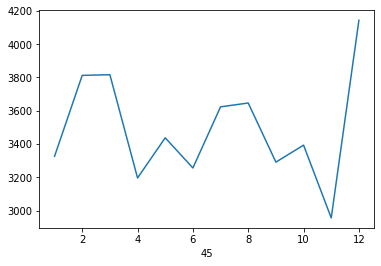

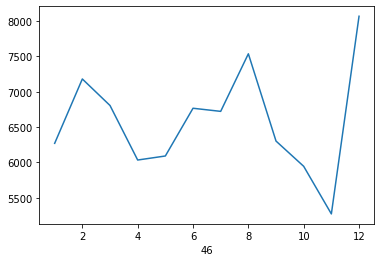

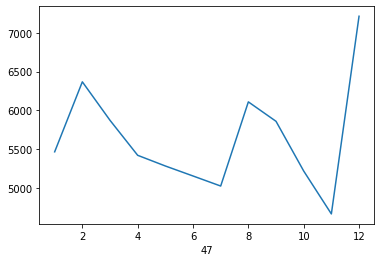

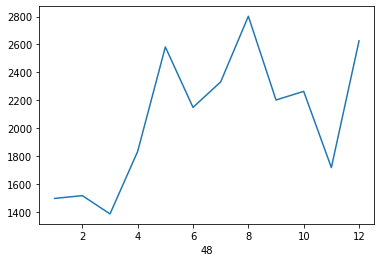

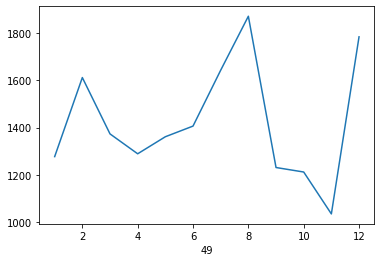

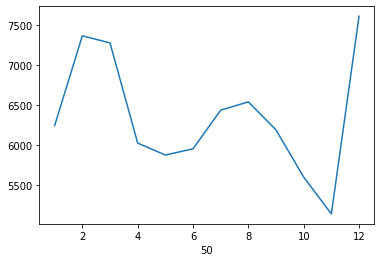

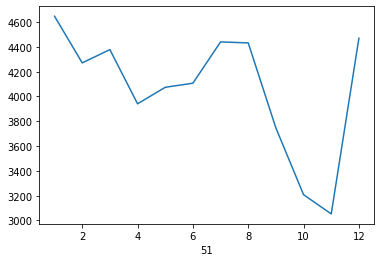

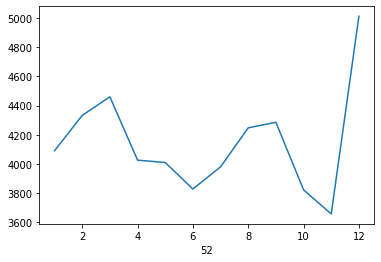

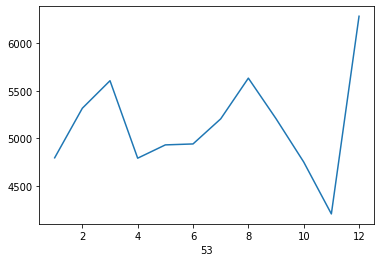

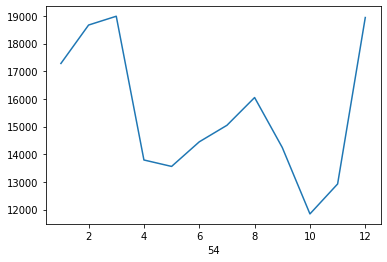

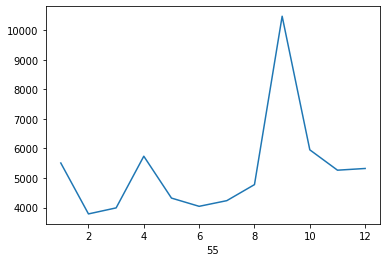

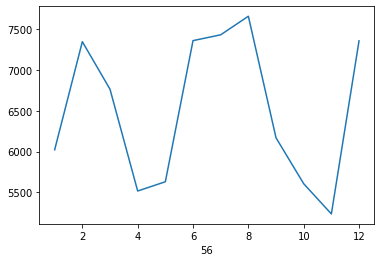

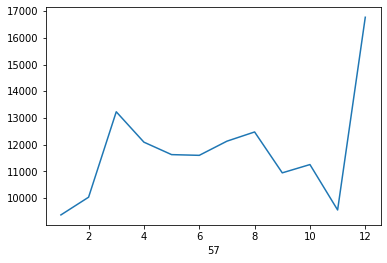

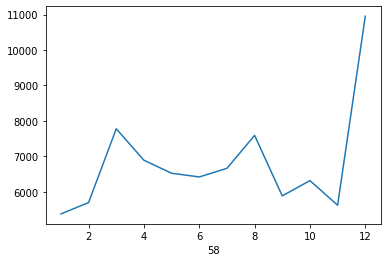

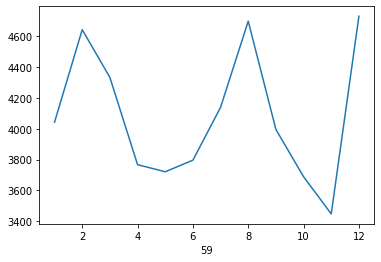

In [62]:
import matplotlib.pyplot as plt
shops_id = a.shop_id.unique()
for shop_id in shops_id:
    temp_df = a[a['shop_id'] == shop_id]
    plt.figure()    
    plt.xlabel(shop_id)
    plt.plot(temp_df['month'], temp_df['item_cnt_day'])
    

In [63]:
#What category sells more?
sales.head()


,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,0,59,22154,999.00,1.0,1,2,2013
1,0,25,2552,899.00,1.0,1,3,2013
2,0,25,2552,899.00,-1.0,1,5,2013
3,0,25,2554,1709.05,1.0,1,6,2013
4,0,25,2555,1099.00,1.0,15,1,2013


In [65]:
items_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [66]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [72]:
q2_df = sales.join(items, on="item_id", rsuffix="_").join(items_categories, on="item_category_id", rsuffix="_").drop(['item_id', "item_category_id", "item_id_", "item_category_id_" ], axis=1)
q2_df.head()

,date_block_num,shop_id,item_price,item_cnt_day,day,month,year,item_name,item_category_name
0,0,59,999.00,1.0,1,2,2013,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,0,25,899.00,1.0,1,3,2013,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,0,25,899.00,-1.0,1,5,2013,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,0,25,1709.05,1.0,1,6,2013,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,0,25,1099.00,1.0,15,1,2013,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства
